# COVID19 test result analysis for counties in NY State

In [1]:
# COVID19 test results in counties in NY State

# Code development:
# Oliver Elison Timm
# Alex Mitchell
# Fangze Zhu
# and students in ATM/ENV 315 course, UAlbany spring 2020


In [2]:
import certifi
import urllib3
import numpy as np
import json
import datetime as dt
import matplotlib.pyplot as plt


def get_county_names():
    
    """support function that extracts the names of the counties from the data source
    
    Returns:
        counties: list with the county names (strings)
    
    """
    data_source="https://health.data.ny.gov/resource/xdss-u53e.json"
    try:
        http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
        received = http.request('GET', data_source)
        result_json_fmt=received.data.decode('utf-8') # returns a dictionary
        content =  json.loads(result_json_fmt)

    except:
        print ("Something went wrong while connecting to "+data_source)             

    counties = []

    for i in np.arange(0,62,1):
        counties.append((str((content[i]['county']))))
    
    return counties

def get_test_data_ny(county):
    
    """sends request to data server and gets latest COVID19 test results
    
    Input parameter:
        county (string): name of the county you want to get data from.
        
    Returns:
        1-d array with dates and 
        2-d numpy array with data arranged in columns:
        0: new_positives
        1: cumulative_number_of_positives
        2: total_number_of_tests
        3: cumulative_number_of_tests
        Each day is stored in a row
    """
    
    data_source="https://health.data.ny.gov/resource/xdss-u53e.json"
    data_query="?county="+county
    test=True # set this to False if you want to suppress the printed output 
    
    try: 
        print("contact server "+data_source)
        print("with query "+data_query)
        print("...")
        http = urllib3.PoolManager(cert_reqs='CERT_REQUIRED', ca_certs=certifi.where())
        received = http.request('GET', data_source+data_query)
        result_json_fmt=received.data.decode('utf-8') # returns a dictionary
        content =  json.loads(result_json_fmt)
        print("done")
    except:
        print ("Something went wrong while connecting to "+data_source)
        print ("request made: "+data_request)


    if test:
        print (type(content[0]))
        print (content[0].keys())

    # list comprehension done here
    # convert date string into datetime object and put all in a list
    datelist=[dt.datetime.strptime(item['test_date'][0:10],"%Y-%m-%d") for item in content]
    ntime=len(datelist)
    

    time=np.array(datelist,dtype=np.datetime64)

    # convert list with datetime into numpy array 
    data_name=['new_positives','cumulative_number_of_positives','total_number_of_tests','cumulative_number_of_tests']
    nrow=ntime 
    ncol=len(data_name)+1
    dummy=-99
    x=np.zeros(shape=[nrow,ncol])+dummy # so we can see if there were gaps in the data for some reason
    
    # list comprehension and conversion of list into numpy array with values
    k=0 # start with column 1 for the test data, column 0 is the date 
    for name in data_name:
        listbuffer=[ item[name] for item in content]
        x[:,k]=np.array(listbuffer,dtype=int)
        k=k+1
    return time,x


In [3]:


# we call the function to get all county names that are in the data base
counties=get_county_names()

for i,c in enumerate(counties):
    print (i,c)


0 Albany
1 Allegany
2 Bronx
3 Broome
4 Cattaraugus
5 Cayuga
6 Chautauqua
7 Chemung
8 Chenango
9 Clinton
10 Columbia
11 Cortland
12 Delaware
13 Dutchess
14 Erie
15 Essex
16 Franklin
17 Fulton
18 Genesee
19 Greene
20 Hamilton
21 Herkimer
22 Jefferson
23 Kings
24 Lewis
25 Livingston
26 Madison
27 Monroe
28 Montgomery
29 Nassau
30 New York
31 Niagara
32 Oneida
33 Onondaga
34 Ontario
35 Orange
36 Orleans
37 Oswego
38 Otsego
39 Putnam
40 Queens
41 Rensselaer
42 Richmond
43 Rockland
44 Saratoga
45 Schenectady
46 Schoharie
47 Schuyler
48 Seneca
49 Steuben
50 St. Lawrence
51 Suffolk
52 Sullivan
53 Tioga
54 Tompkins
55 Ulster
56 Warren
57 Washington
58 Wayne
59 Westchester
60 Wyoming
61 Yates


In [4]:
time,x=get_test_data_ny("Bronx")





contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Bronx
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])


## Example code for getting the data and plotting the test results
### Three counties are used here as an example


contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Albany
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Westchester
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=New York
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])


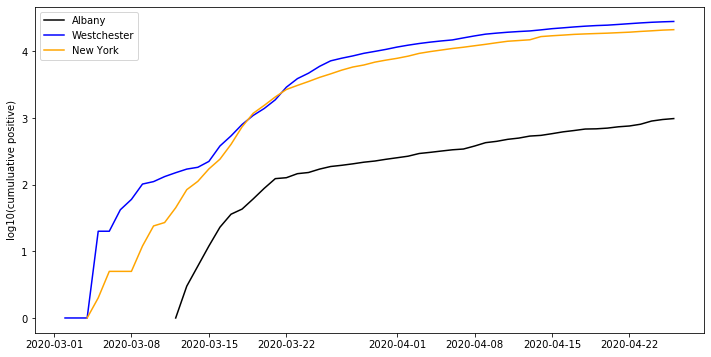

In [5]:
county_list=['Albany','Westchester','New York']
color_list=['black','blue','orange','red']
# collect all data and plot the cumulative positive tests (log-scale)
plt.figure(figsize=[12,6])
i=0
for county in county_list:
    time,x=get_test_data_ny(county)
    iuse=x[:,1]>0
    plt.plot(time[iuse],np.log10(x[iuse,1]),color=color_list[i],label=county)
    i=i+1
plt.legend()
plt.ylabel("log10(cumuluative positive)")
plt.show()





contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Albany
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Westchester
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=New York
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])


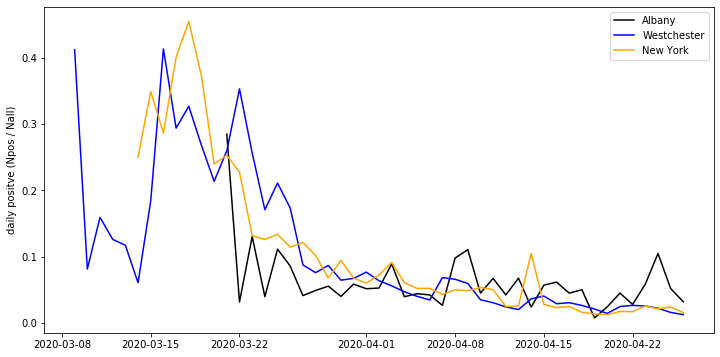

In [6]:
county_list=['Albany','Westchester','New York']
color_list=['black','blue','orange','red']
i=0
plt.figure(figsize=[12,6])
# percentage of positive tests in the daily tests
for county in county_list:

    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,1]>100
    plt.plot(time[iuse],x[iuse,0]/x[iuse,1],color=color_list[i],label=county)
    i=i+1
plt.legend()
plt.ylabel("daily positve (Npos / Nall)")
plt.show()





contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Albany
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=Westchester
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])
contact server https://health.data.ny.gov/resource/xdss-u53e.json
with query ?county=New York
...
done
<class 'dict'>
dict_keys(['test_date', 'county', 'new_positives', 'cumulative_number_of_positives', 'total_number_of_tests', 'cumulative_number_of_tests'])


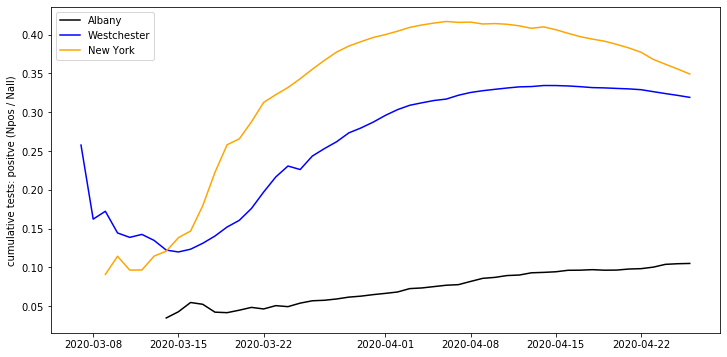

In [7]:
county_list=['Albany','Westchester','New York']
color_list=['black','blue','orange','red']
plt.figure(figsize=[12,6])
# percentage of positive tests in the cumulative tests
i=0
for county in county_list:

    time,x=get_test_data_ny(county)
    # find rows with cumulative positives > 1
    iuse=x[:,3]>100
    plt.plot(time[iuse],x[iuse,1]/x[iuse,3],color=color_list[i],label=county)
    i=i+1
plt.legend()
plt.ylabel("cumulative tests: positve (Npos / Nall)")
plt.show()



# Research tasks for teams:
    
We want to test the hypothesis that the upstate counties have a significantly lower percentage positive test rate than the downstate counties. 


__(1) Decide in your team, which of the three plotted quanities gives you the best metric to compare the positive tests results among counties?__

 - (A) total number of cumulative positives
 - (B) daily number of positives divided by daily number of all tests (all= positive + negative)
 - (C) using the cumulative positive divided by cumulative total test numbers
 - (D) Another metric that your team suggests 


__(2) Visit the NYSDOH COVID-19 Tracker web page and explore which county have less than 10 percent positive tests currently, and in which region do you find counties with more than 30 percent positive tests.__

__(3) Create a list with 10 upstate counties away from the epicenter, and ten downstate counties inside or close to the epicenter (epicenter: New York City region).__

__(4) Update the scripts so that you can generate the plot showing the time series for upstate and downstate counties.  Use easy to identify line styles or markers symbols in the plots for the two county groups.__

__(5) For the latest date in the data, calculate for the two county groups the average positve test percentage rate, and 95% confidence intervals.__



References:
- [NY COVID19 tracker](https://covid19tracker.health.ny.gov/views/NYS-COVID19-Tracker/NYSDOHCOVID-19Tracker-Map?%3Aembed=yes&%3Atoolbar=no&%3Atabs=n)
- [Data access source](https://dev.socrata.com/foundry/health.data.ny.gov/xdss-u53e)